$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

*Type your name here and rewrite all of the following sections.  Add more sections to present your code, results, and discussions.*

## Overview

The goal of this assignment is to learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create one new version of that class, apply it to a data set, and discuss the results.

## Required Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.10493991925 Scale 0.00461637074885
SCG: Iteration 20 fValue Eval 0.0882095020604 Scale 4.50817455942e-06
SCG: Iteration 30 fValue Eval 0.0553554584031 Scale 0.000288523171803
SCG: Iteration 40 fValue Eval 0.03083890475 Scale 2.25408727971e-06
SCG: Iteration 50 fValue Eval 0.0160932109988 Scale 0.00115409268721
SCG: Iteration 60 fValue Eval 0.0114382944581 Scale 1.12704363986e-06
SCG: Iteration 70 fValue Eval 0.00790353041489 Scale 1.10062855455e-09
SCG: Iteration 80 fValue Eval 0.00353943048289 Scale 1.0748325728e-12
SCG: Iteration 90 fValue Eval 0.00196573170531 Scale 1.04964118437e-15
SCG: Iteration 100 fValue Eval 0.000647772848673 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0440 seconds. Final error is 0.025451382058207652.

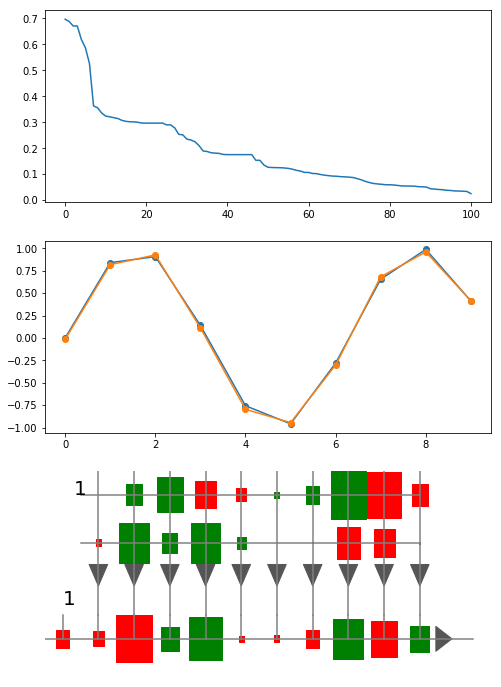

In [27]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now let's extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Copy your file *neuralnetworks.py* into a new file named *neuralnetworks2.py*.  Modify the code in *neuralnetworksA2.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activationDerivative```.

In [28]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [29]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [30]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [31]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.176123031799 Scale 0.0140677862321
SCG: Iteration 20 fValue Eval 0.0888462457554 Scale 1.37380724923e-05
SCG: Iteration 30 fValue Eval 0.0630394450876 Scale 0.000879236639504
SCG: Iteration 40 fValue Eval 0.0212298517861 Scale 1.71725906153e-06
SCG: Iteration 50 fValue Eval 0.0111595867995 Scale 1.67701080228e-09
SCG: Iteration 60 fValue Eval 0.00812527557061 Scale 1.6377058616e-12
SCG: Iteration 70 fValue Eval 0.00562221640989 Scale 1.59932213047e-15
SCG: Iteration 80 fValue Eval 0.00414227041085 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00172997866933 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.00085553028605 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0540 seconds. Final error is 0.029249449329001774.

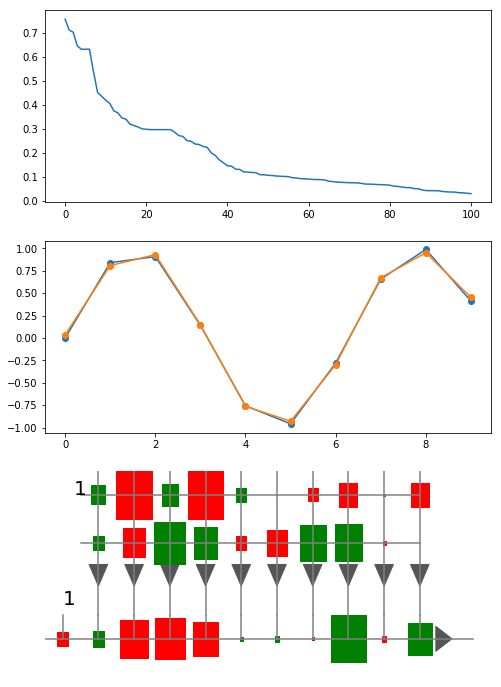

In [32]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

Using your new ```NeuralNetwork``` class, you can compare the error obtained on a given data set by looping over various hidden layer structures.  Here is an example using the simple toy data from above.

In [33]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [34]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [35]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  7.094375e-01  0.391482
1                    [1]  6.166364e-01  0.462910
2                 [1, 1]  6.166364e-01  0.464156
3              [1, 1, 1]  6.533288e-01  0.355753
4           [1, 1, 1, 1]  6.166364e-01  0.464678
5        [1, 1, 1, 1, 1]  6.166364e-01  0.465679
6                    [5]  6.978541e-15  0.448103
7                 [5, 5]  3.690578e-15  0.592271
8              [5, 5, 5]  3.916178e-14  0.485586
9           [5, 5, 5, 5]  4.925269e-14  0.485347
10       [5, 5, 5, 5, 5]  6.694233e-14  0.497232
11                  [10]  1.076480e-14  0.502227
12              [10, 10]  1.5

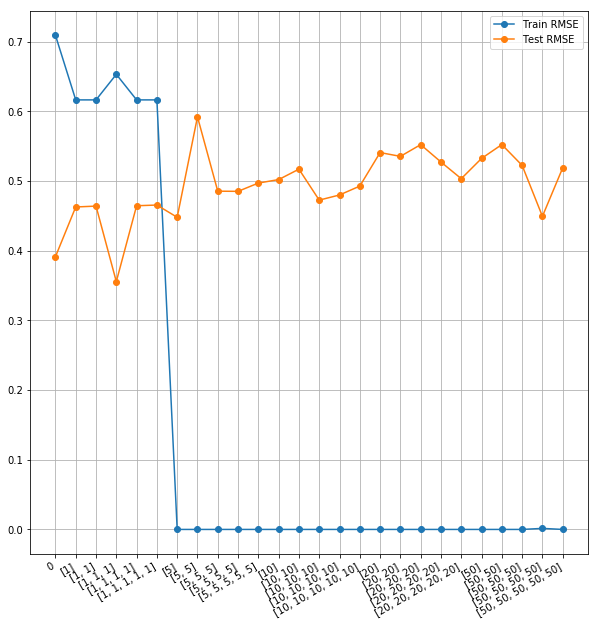

In [36]:
import pandas as pd

errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

For this data (and the random shuffling of the data used when this notebook was run), `[10, 10, 10, 10]` produced the lowest test error.  

Now, using the best hidden layer structure found, write the code that varies the number of training iterations. The results you get will be different from the ones shown below.

In [ ]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = [0] + [[nu] * nl for nu in nIterationsList for nl in [1, 2, 3, 4, 5]]
#print('hiddens =', hiddens)
#for iternum in nIterationsList:
    #print(iternum)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iternum)
    #nIterationsList.append([nnet.use(Xtrain),nnet.use(Xtest)])
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

#  ...  insert code here using the code in the previous code block as a guide ...

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

### Experiments wtih Automobile Data

Now, repeat the above steps with the automobile mpg data we have used before.  Set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

Include the code, output, and graphs like the above examples. Discuss the results.  Investigate and discuss how much the best hidden layer structure and number of training iterations vary when you repeat the runs.

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A2.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook and `neuralnetworkA2.py` into one zip file or tar file.  Name your tar file `Lastname-A2.tar` or your zip file `Lastname-A2.zip`.  Check in your tar or zip file using the `Assignment 2` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [38]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Armijo-A2.ipynb' and storing in notebookcode.py


SyntaxError: invalid syntax (eval, line 4)

## Extra Credit

Repeat the comparisons of hidden layer structures and numbers of training iterations on a second data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml).